In [1]:
import pandas as pd
import numpy as np
from plotnine import *
#from plotnine.data import *
import matplotlib.pyplot as plt


## (a) 单数剧系列条形图

In [2]:
df = pd.read_csv('Stackedbar_Data.csv')

df = df.sort_values(by='Pensions', ascending=True)

df['Country'] = pd.Categorical(df['Country'], categories=df['Country'], ordered=True)
df


,Country,Pensions,Income,Health,Other services
5,Britain,6,6,8,4
7,United States,7,3,8,1
1,Sweden,8,6,7,8
6,OECD_average,8,5,6,3
4,Spain,9,7,7,2
3,Germany,11,5,8,3
0,France,14,5,9,3
2,Italy,15,4,7,1


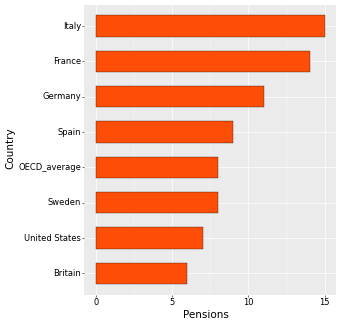

<ggplot: (141756386847)>


In [3]:
base_plot = (ggplot(df, aes('Country', 'Pensions')) +
             # "#00AFBB"
             geom_bar(stat="identity", color="black", width=0.6, fill="#FC4E07", size=0.25) +
             # scale_fill_manual(values=brewer.pal(9,"YlOrRd")[c(6:2)])+
             coord_flip() +
             theme(
    axis_title=element_text(size=15, face="plain", color="black"),
    axis_text=element_text(size=12, face="plain", color="black"),
    legend_title=element_text(size=13, face="plain", color="black"),
    legend_position="right",
    aspect_ratio=1.15,
    figure_size=(6.5, 6.5),
    dpi=50
))

print(base_plot)


## (b)双数剧系列条形图

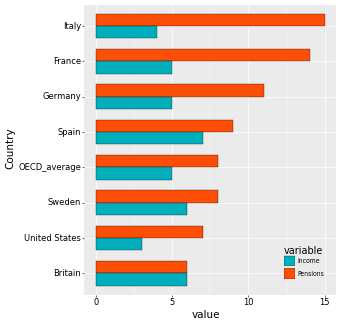

<ggplot: (141756933626)>


In [4]:
df = pd.read_csv('Stackedbar_Data.csv')

df = df.iloc[:, [0, 2, 1]]
df = df.sort_values(by='Pensions', ascending=True)
mydata = pd.melt(df, id_vars='Country')

mydata['Country'] = pd.Categorical(mydata['Country'], categories=df['Country'], ordered=True)


base_plot = (ggplot(mydata, aes('Country', 'value', fill='variable')) +
             geom_bar(stat="identity", color="black", position=position_dodge(), width=0.7, size=0.25) +
             scale_fill_manual(values=("#00AFBB", "#FC4E07", "#E7B800")) +
             coord_flip() +
             theme(
    axis_title=element_text(size=15, face="plain", color="black"),
    axis_text=element_text(size=12, face="plain", color="black"),
    legend_title=element_text(size=14, face="plain", color="black"),
    legend_background=element_blank(),
    legend_position=(0.8, 0.2),
    aspect_ratio=1.15,
    figure_size=(6.5, 6.5),
    dpi=50
))
print(base_plot)


## (c)堆积条形图

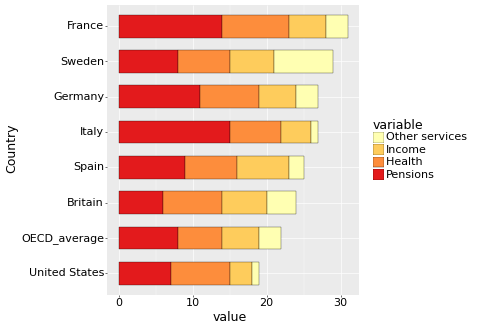

<ggplot: (141756969963)>


In [5]:
df = pd.read_csv('Stackedbar_Data.csv')
Sum_df = df.iloc[:, 1:].apply(
    lambda x: x.sum(), axis=0).sort_values(ascending=True)
meanRow_df = df.iloc[:, 1:].apply(lambda x: x.mean(), axis=1)
Sing_df = df['Country'][meanRow_df.sort_values(ascending=True).index]
mydata = pd.melt(df, id_vars='Country')
mydata['variable'] = pd.Categorical(mydata['variable'], categories=Sum_df.index, ordered=True)
mydata['Country'] = pd.Categorical(mydata['Country'], categories=Sing_df, ordered=True)


base_plot = (ggplot(mydata, aes('Country', 'value', fill='variable')) +
             geom_bar(stat="identity", color="black", position='stack', width=0.65, size=0.25) +
             scale_fill_brewer(palette="YlOrRd") +
             coord_flip() +
             theme(
    axis_title=element_text(size=18, face="plain", color="black"),
    axis_text=element_text(size=16, face="plain", color="black"),
    legend_title=element_text(size=18, face="plain", color="black"),
    legend_text=element_text(size=16, face="plain", color="black"),
    legend_background=element_blank(),
    legend_position='right',
    aspect_ratio=1.15,
    figure_size=(6.5, 6.5),
    dpi=50
))
print(base_plot)
# base_plot.save('堆积条形图.pdf')


## (d) 百分比堆积柱形图

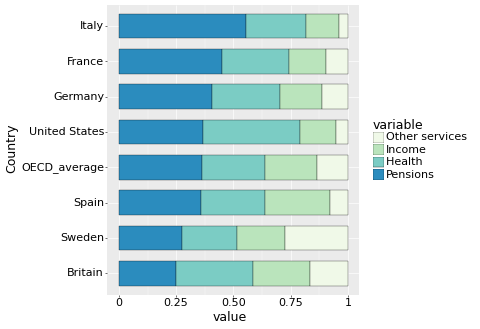

<ggplot: (141756392063)>


In [6]:
df = pd.read_csv('Stackedbar_Data.csv')
SumCol_df = df.iloc[:, 1:].apply(lambda x: x.sum(), axis=1)
df.iloc[:, 1:] = df.iloc[:, 1:].apply(lambda x: x/SumCol_df, axis=0)

meanRow_df = df.iloc[:, 1:].apply(
    lambda x: x.mean(), axis=0).sort_values(ascending=True)
Per_df = df.loc[:, meanRow_df.idxmax()].sort_values(ascending=True)
Sing_df = df['Country'][Per_df.index]

mydata = pd.melt(df, id_vars='Country')
mydata['Country'] = pd.Categorical(mydata['Country'], categories=Sing_df, ordered=True)
mydata['variable'] = pd.Categorical(mydata['variable'], categories=meanRow_df.index, ordered=True)


base_plot = (ggplot(mydata, aes(x='Country', y='value', fill='variable'))
             + geom_bar(stat="identity", color="black",
                        position='fill', width=0.7, size=0.25)
             + scale_fill_brewer(palette="GnBu")
             + coord_flip()
             + theme(
    # text=element_text(size=15,face="plain",color="black"),
    axis_title=element_text(size=18, face="plain", color="black"),
    axis_text=element_text(size=16, face="plain", color="black"),
    legend_title=element_text(size=18, face="plain", color="black"),
    legend_text=element_text(size=16, face="plain", color="black"),
    aspect_ratio=1.15,
    figure_size=(6.5, 6.5),
    dpi=50
)
)
print(base_plot)
# base_plot.save('百分比堆积柱形图.pdf')
